# Question 1

### Cross validation for nearest neighbor classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from matplotlib.patches import Circle

In [2]:
## Load the data
data = np.loadtxt('wine.data', delimiter=',')

In [3]:
data.shape

(178, 14)

In [4]:
# split into the labels and the data
x= np.delete(data,0, axis=1)
y = data[:,0]

In [5]:
#1-NN Classifier
kNN = KNeighborsClassifier(n_neighbors=1)
#LOOOCV Classifier
loo = LeaveOneOut()

#initialize
scores=[]
conf_matrix= np.zeros((3,3))
#train and test the classifiers
for train_index, test_index in loo.split(x):
    x_train, x_test = x[train_index], x[test_index] #generate indices with loo
    y_train, y_test = y[train_index], y[test_index]
    kNN.fit(x_train, y_train)
    score = kNN.score(x_test, y_test)
    scores.append(score)
    #acuracy
    accuracy = sum(scores) / len(scores)
    #confusion matrix
    ypred = kNN.predict(x_test)
    conf_matrix += confusion_matrix(y_test, ypred, labels=[1, 2,3])

In [6]:
print("Accuracy of the LOOCV classifier: {:.2f}".format(accuracy))

Accuracy of the LOOCV classifier: 0.77


In [7]:
print(conf_matrix)

[[52.  3.  4.]
 [ 5. 54. 12.]
 [ 3. 14. 31.]]


### b.) 

In [8]:
kfold = KFold(n_splits=20, shuffle=True,random_state=0)
k_values = []
accuracies = []

#start iterating through the k values
for k in range(2,101,5): 
    kfold.n_splits = k
    k_values.append(k) #store our kvalues
    scores= cross_val_score(kNN, x, y, cv=kfold) #k-fold cross-validation
    accuracies.append(scores.mean())

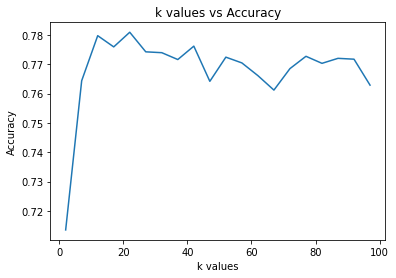

In [9]:
#plotting
plt.plot(k_values, accuracies)
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.title('k values vs Accuracy')
plt.show()

### c)

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x)
x_normalized = scaler.transform(x)

In [11]:
#1-NN Classifier
knn = KNeighborsClassifier(n_neighbors=1)
#LOOOCV Classifier
loo = LeaveOneOut()

#initialize
scores2=[]
conf_matrix2= np.zeros((3,3))
#train and test the classifiers
for train_index2, test_index2 in loo.split(x_normalized):
    x_train2, x_test2 = x[train_index2], x[test_index2] #generate indices with loo
    y_train2, y_test2 = y[train_index2], y[test_index2]
    knn.fit(x_train2, y_train2)
    score2 = knn.score(x_test2, y_test2)
    scores2.append(score2)
    #acuracy
    accuracy2 = sum(scores2) / len(scores2)
    #confusion matrix
    ypred2 = knn.predict(x_test2)
    conf_matrix2 += confusion_matrix(y_test2, ypred2, labels=[1, 2,3])

In [12]:
print("Accuracy of the LOOCV classifier: {:.2f}".format(accuracy2))

Accuracy of the LOOCV classifier: 0.77


In [13]:
print(conf_matrix2)

[[52.  3.  4.]
 [ 5. 54. 12.]
 [ 3. 14. 31.]]


Normalization did not help the performance of my model. This could be due to the small size of my model - 178 observations. Another option is that my data was already on the same scale, and normalization may not have any effect on my model's performance.

## 2. Gaussian scatterplots

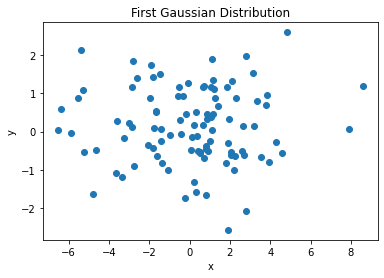

In [14]:
mean = [0, 0]
cov = [[9, 0], [0, 1]]

# draw 100 random samples
samples = np.random.multivariate_normal(mean, cov, 100)

# extract the x and y coordinates
x = samples[:, 0] # array of two columns and 100rows, 1st row is the x
y = samples[:, 1]


# plot the samples
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('First Gaussian Distribution')
plt.show()

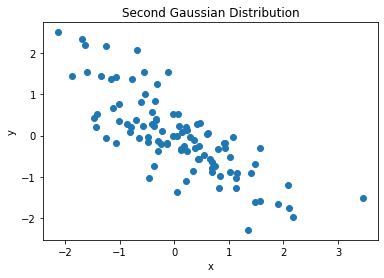

In [15]:
mean = [0, 0]
cov = [[1, -0.75], [-0.75, 1]]

# draw 100 random samples
samples = np.random.multivariate_normal(mean, cov, 100)

# extract the x and y coordinates
x = samples[:, 0] # array of two columns and 100rows, 1st row is the x
y = samples[:, 1]

# plot the samples
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Second Gaussian Distribution')
plt.show()